# Soporte vectorial
En el presente estudio, se realiza el análisis y modelado de un conjunto de datos relacionado con el uso de tarjetas de crédito. El objetivo principal es construir un modelo de clasificación que permita predecir la clase de las observaciones a partir de dos variables predictoras seleccionadas. Para ello, se ha empleado el método de Soporte Vectorial (SVM, por sus siglas en inglés), específicamente con un kernel lineal.
---



In [ ]:

# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
from pandas._libs.tslibs import delta_to_nanoseconds
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Datos
# ==============================================================================
# Cargamos el conjunto de datos desde un archivo CSV.
datos = pd.read_csv('/content/tarjetas.csv', header=0, delimiter=";", decimal=",")

# Eliminar filas con valores nulos
datos.dropna(inplace=True)

# Excluimos de la base las columnas de variables categoricas
datos = datos.drop("id", axis=1)

datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22406 entries, 0 to 22405
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      22406 non-null  float64
 1   V2      22406 non-null  float64
 2   V3      22406 non-null  float64
 3   V4      22406 non-null  float64
 4   V5      22406 non-null  float64
 5   V6      22406 non-null  float64
 6   V7      22406 non-null  float64
 7   V8      22406 non-null  float64
 8   V9      22406 non-null  float64
 9   V10     22406 non-null  float64
 10  V11     22406 non-null  float64
 11  V12     22406 non-null  float64
 12  V13     22406 non-null  float64
 13  V14     22406 non-null  float64
 14  V15     22406 non-null  float64
 15  V16     22406 non-null  float64
 16  V17     22406 non-null  float64
 17  V18     22406 non-null  float64
 18  V19     22406 non-null  float64
 19  V20     22406 non-null  float64
 20  V21     22406 non-null  float64
 21  V22     22406 non-null  float64
 22

In [ ]:
# Mantenemos solo dos variables predictores y una de clase
datos2 = datos.iloc[ :, [4,8,29]]

datos2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22406 entries, 0 to 22405
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V5      22406 non-null  float64
 1   V9      22406 non-null  float64
 2   Class   22406 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 525.3 KB


In [ ]:
# Reducimos de forma aleatoria la base
porcentaje_reduccion = 0.005
datosr = datos2.sample(frac=porcentaje_reduccion, random_state=123)

len(datosr.index)

frecuencia_genero = datosr['Class'].value_counts()
print(frecuencia_genero)

1    68
0    44
Name: Class, dtype: int64


Text(0, 0.5, 'V9')

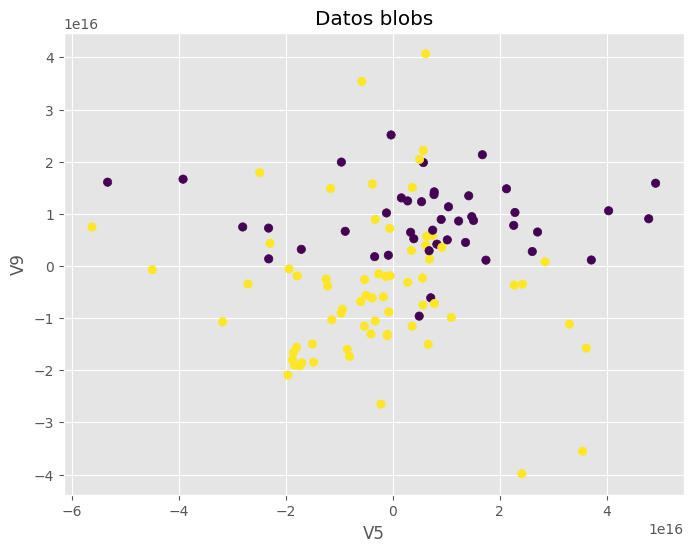

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
scatter = ax.scatter(datosr.V5, datosr.V9, c=datosr.Class, cmap='viridis')
ax.set_title("Datos blobs")
ax.set_xlabel("V5")
ax.set_ylabel("V9")

#Violeta : 0
#Amarillo : 1

Text(0, 0.5, 'V9')

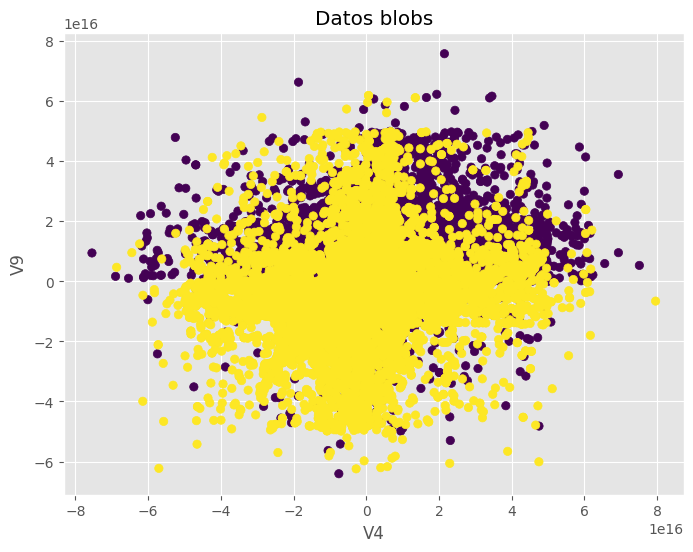

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
scatter = ax.scatter(datos.V5, datos.V9, c=datos.Class, cmap='viridis')
ax.set_title("Datos blobs")
ax.set_xlabel("V4")
ax.set_ylabel("V9")

#Violeta : 0
#Amarillo : 1

In [ ]:
# División de los datos en train y test
# ==============================================================================
X = datosr.drop(columns = 'Class')
y = datosr['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y.values.reshape(-1,1), train_size=0.8, random_state=1234, shuffle= True)

In [ ]:
# Creación del modelo SVM lineal
# ==============================================================================
modelo = SVC(gamma=0.1, C = 10, kernel = 'linear', random_state=123)
modelo.fit(X_train, y_train)

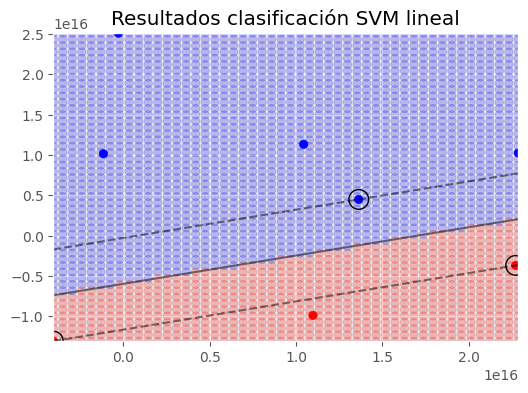

In [ ]:
# Representación gráfica de los límites de clasificación
# ==============================================================================
# Grid de valores
x = np.linspace(np.min(X_train.V5), np.max(X_train.V5), 50)
y = np.linspace(np.min(X_train.V9), np.max(X_train.V9), 50)
Y, X = np.meshgrid(y, x)
grid = np.vstack([X.ravel(), Y.ravel()]).T

# Predicción valores grid
pred_grid = modelo.predict(grid)

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(grid[:,0], grid[:,1], c=pred_grid, alpha = 0.2)
ax.scatter(X_train.V5, X_train.V9, c=y_train, alpha = 1)

# Vectores soporte
ax.scatter(
    modelo.support_vectors_[:, 0],
    modelo.support_vectors_[:, 1],
    s=200, linewidth=1,
    facecolors='none', edgecolors='black'
)

# Hiperplano de separación
ax.contour(
    X,
    Y,
    modelo.decision_function(grid).reshape(X.shape),
    colors = 'k',
    levels = [-1, 0, 1],
    alpha  = 0.5,
    linestyles = ['--', '-', '--']
)

ax.set_title("Resultados clasificación SVM lineal");

In [ ]:
# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X_test)
predicciones

array([1, 1, 1])

In [ ]:
# Accuracy de test del modelo
# ==============================================================================
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 66.66666666666666%


In [ ]:
# Grid de hiperparámetros
# ==============================================================================
param_grid = {'C': np.logspace(-5, 7, 20)}

# Búsqueda por validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator = SVC(kernel='linear', gamma='scale'),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = -1,
        cv         = 3,
        verbose    = 0,
        return_train_score = True
      )

# Se asigna el resultado a _ para que no se imprima por pantalla
_ = grid.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(5)

,param_C,mean_test_score,std_test_score,mean_train_score,std_train_score
0,0.00001,0.888889,0.157135,1.0,0.0
1,0.000043,0.888889,0.157135,1.0,0.0
18,2335721.46909,0.888889,0.157135,1.0,0.0
17,545559.478117,0.888889,0.157135,1.0,0.0
16,127427.49857,0.888889,0.157135,1.0,0.0


In [ ]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

modelo = grid.best_estimator_

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'C': 1e-05} : 0.8888888888888888 accuracy


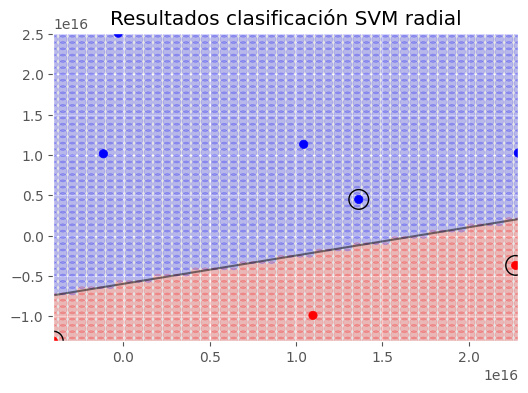

In [ ]:
# Representación gráfica de los límites de clasificación
# ==============================================================================
# Grid de valores
x = np.linspace(np.min(X_train.V5), np.max(X_train.V5), 50)
y = np.linspace(np.min(X_train.V9), np.max(X_train.V9), 50)
Y, X = np.meshgrid(y, x)
grid = np.vstack([X.ravel(), Y.ravel()]).T

# Predicción valores grid
pred_grid = modelo.predict(grid)

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(grid[:,0], grid[:,1], c=pred_grid, alpha = 0.2)
ax.scatter(X_train.V5, X_train.V9, c=y_train, alpha = 1)

# Vectores soporte
ax.scatter(
    modelo.support_vectors_[:, 0],
    modelo.support_vectors_[:, 1],
    s=200, linewidth=1,
    facecolors='none', edgecolors='black'
)

# Hiperplano de separación
ax.contour(
    X,
    Y,
    modelo.decision_function(grid).reshape(X.shape),
    colors='k',
    levels=[0],
    alpha=0.5,
    linestyles='-'
)

ax.set_title("Resultados clasificación SVM radial");

In [ ]:
# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X_test)

In [ ]:
# Accuracy de test del modelo
# ==============================================================================
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 66.66666666666666%


In [ ]:
# Matriz de confusión de las predicciones de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    predicciones,
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix

Predicción,1
Real,
0,1
1,2


A modo de conclusión podemos decir que el modelo de Soporte Vectorial lineal ha proporcionado una primera aproximación valiosa al problema de clasificación en este estudio. Aunque la precisión del 66% indica que hay margen para mejoras, el uso del SVM lineal ha permitido establecer una base metodológica robusta y comprensible. Se explorarán otros modelos estadisticos para aumentar la exactitud de las predicciónes.